In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv


## Title: 
Multilingual Mobile App Reviews – Aug 2025

## Description:
The Multilingual Mobile App Review Dataset – August 2025 contains user-generated feedback on various mobile applications collected from global app marketplaces. Reviews are written in multiple languages, enabling cross-lingual sentiment analysis, opinion mining, and natural language processing research. Each entry typically includes the review text, language code, rating score, timestamp, and associated app metadata such as category and developer. This dataset is well-suited for building and evaluating multilingual sentiment classification models, aspect-based review analysis, translation quality assessment, and user experience research across different cultures and regions.




## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv")

In [3]:
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [4]:
df.tail()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13
2513,2514,1099793,Venmo,Education,"Latest update broke some features, please fix ...",it,2.1,2025-03-04 02:51:17,True,Android,1040,26.0,Bangladesh,Prefer not to say,2.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [6]:
df.describe()

,review_id,user_id,rating,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2477.000000,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.021034,616.704057,44.247812
std,725.873612,2.846939e+06,1.149955,363.745326,18.372290
min,1.000000,1.005990e+05,1.000000,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,1249.000000,75.000000


In [7]:
df.dtypes

review_id              int64
user_id                int64
app_name              object
app_category          object
review_text           object
review_language       object
rating               float64
review_date           object
verified_purchase       bool
device_type           object
num_helpful_votes      int64
user_age             float64
user_country          object
user_gender           object
app_version           object
dtype: object

In [8]:
df.shape

(2514, 15)

In [9]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

## Data visualizations

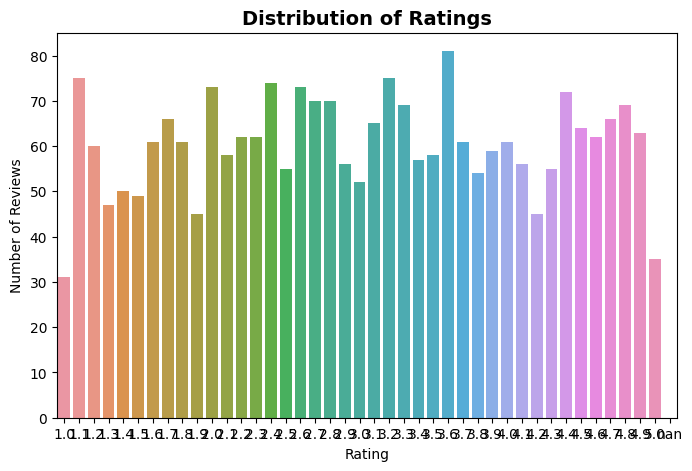

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="rating", order=sorted(df["rating"].unique()))
plt.title("Distribution of Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

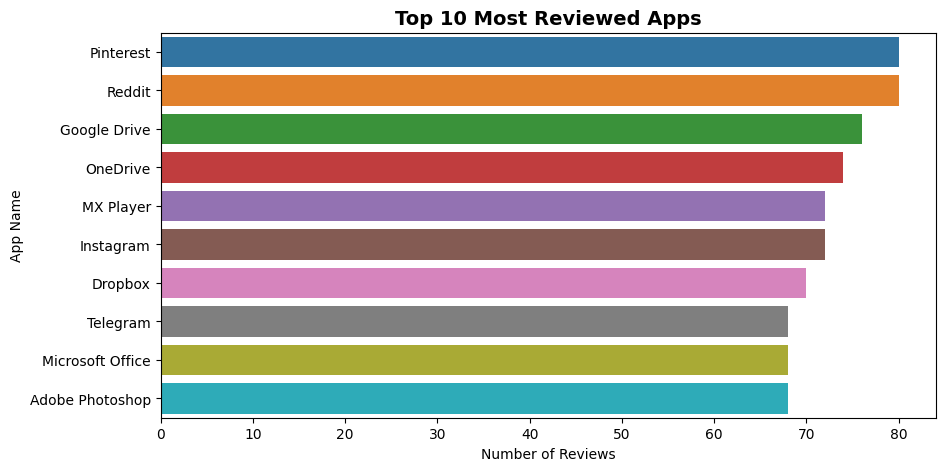

In [13]:
top_apps = df["app_name"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_apps.values, y=top_apps.index)
plt.title("Top 10 Most Reviewed Apps", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reviews")
plt.ylabel("App Name")
plt.show()

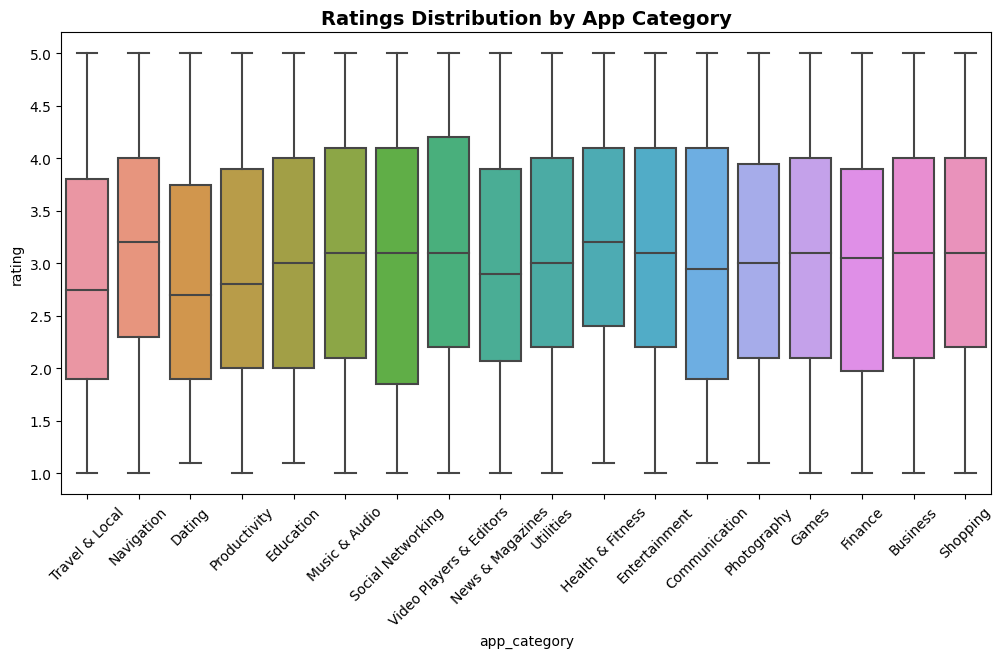

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="app_category", y="rating")
plt.title("Ratings Distribution by App Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


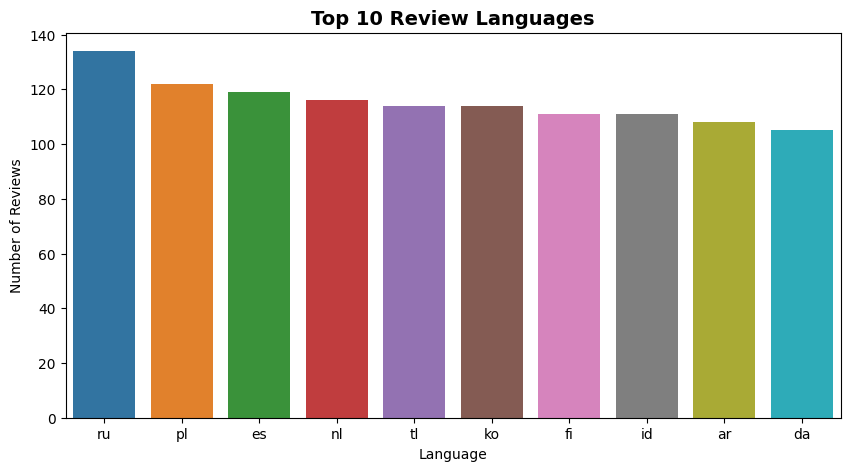

In [15]:
plt.figure(figsize=(10, 5))
lang_counts = df["review_language"].value_counts().head(10)
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title("Top 10 Review Languages", fontsize=14, fontweight='bold')
plt.xlabel("Language")
plt.ylabel("Number of Reviews")
plt.show()

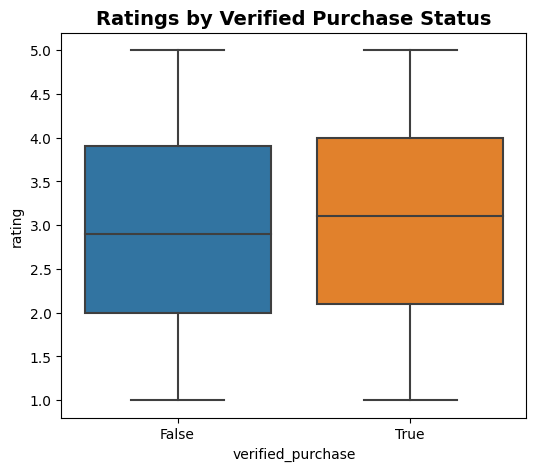

In [16]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="verified_purchase", y="rating")
plt.title("Ratings by Verified Purchase Status", fontsize=14, fontweight='bold')
plt.show()

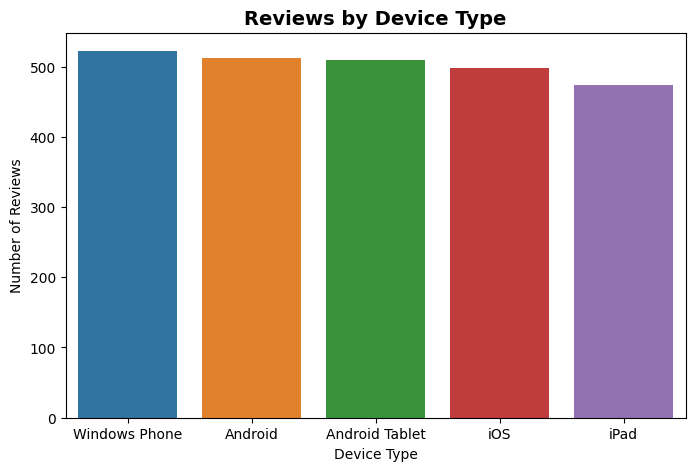

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="device_type", order=df["device_type"].value_counts().index)
plt.title("Reviews by Device Type", fontsize=14, fontweight='bold')
plt.xlabel("Device Type")
plt.ylabel("Number of Reviews")
plt.show()

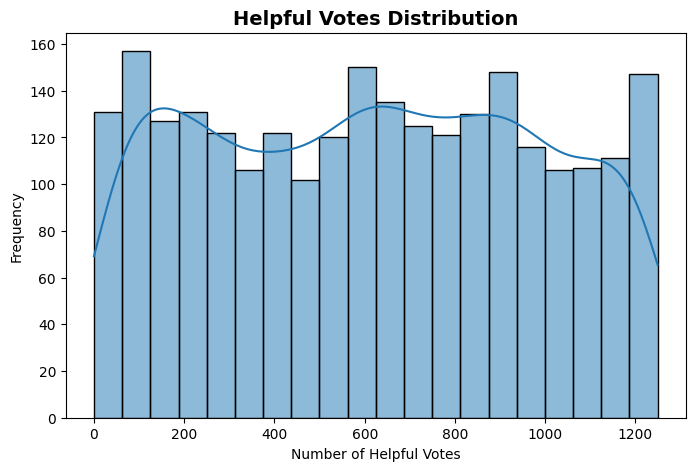

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["num_helpful_votes"], bins=20, kde=True)
plt.title("Helpful Votes Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Number of Helpful Votes")
plt.ylabel("Frequency")
plt.show()

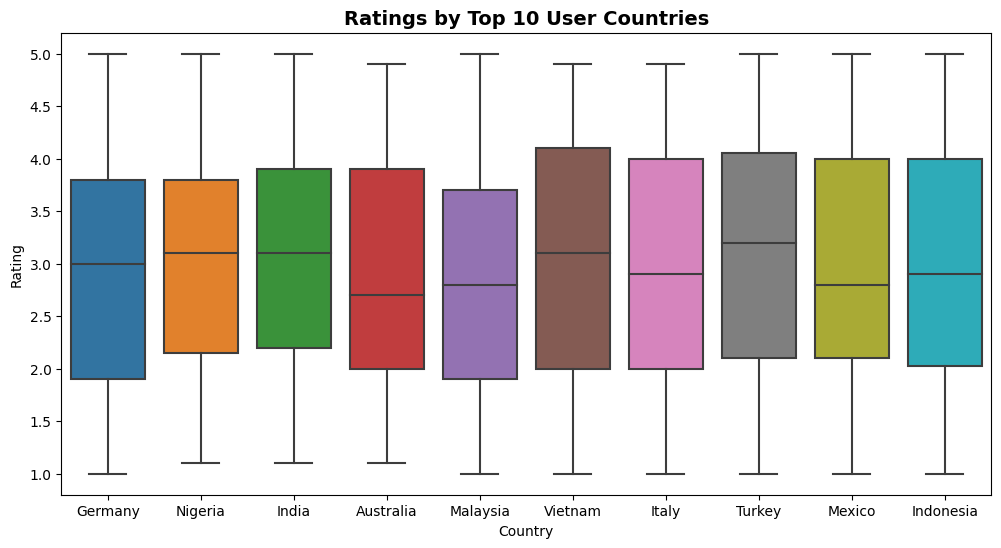

In [19]:
top_countries = df["user_country"].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["user_country"].isin(top_countries)],
            x="user_country", y="rating")
plt.title("Ratings by Top 10 User Countries", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Rating")
plt.show()

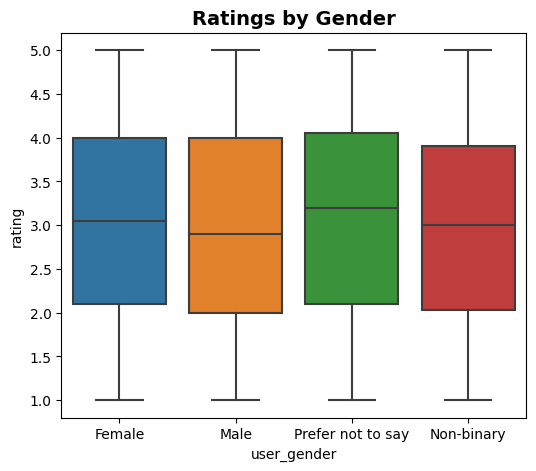

In [20]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="user_gender", y="rating")
plt.title("Ratings by Gender", fontsize=14, fontweight='bold')
plt.show()


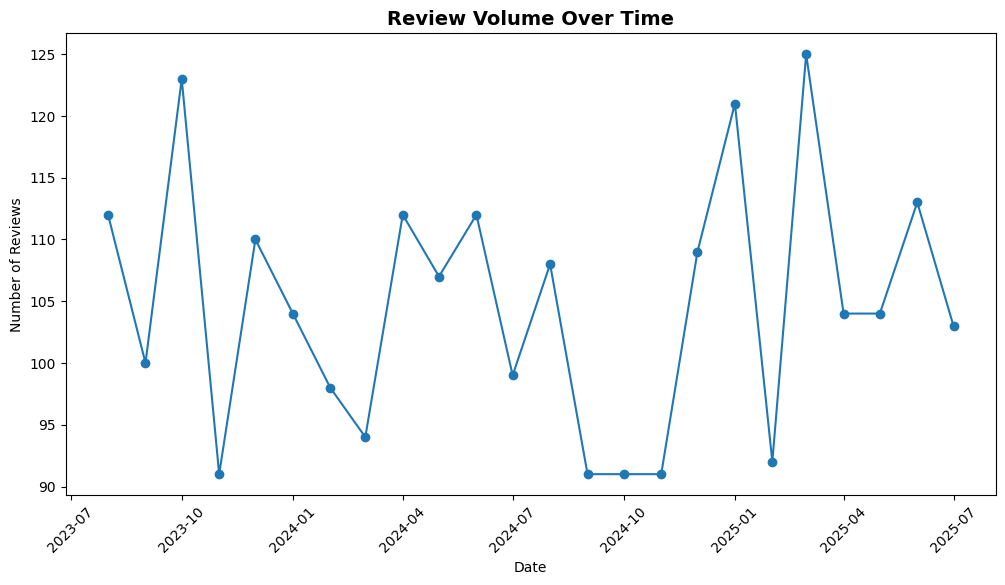

In [21]:
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")
df_time = df.groupby(df["review_date"].dt.to_period("M")).size()
df_time.index = df_time.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(df_time.index, df_time.values, marker='o')
plt.title("Review Volume Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

## Predictive modeling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Fill missing values
df.fillna("Unknown", inplace=True)

# Convert review_date to datetime
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

# Extract date parts (numeric)
df["review_year"] = df["review_date"].dt.year.fillna(0).astype(int)
df["review_month"] = df["review_date"].dt.month.fillna(0).astype(int)
df["review_day"] = df["review_date"].dt.day.fillna(0).astype(int)

# Drop original review_date
df.drop(columns=["review_date"], inplace=True)

# Target variable
target = "verified_purchase"
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object" or X[col].dtype == "bool":
        X[col] = X[col].astype(str)
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode target if needed
if y.dtype == "object" or y.dtype == "bool":
    y = y.astype(str)
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train & evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred) * 100

# Print results
print("Model Accuracies (%):")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}%")


Model Accuracies (%):
Logistic Regression: 77.53%
Decision Tree: 62.23%
Random Forest: 77.53%
Naive Bayes: 77.53%
SVM: 77.53%
KNN: 73.76%


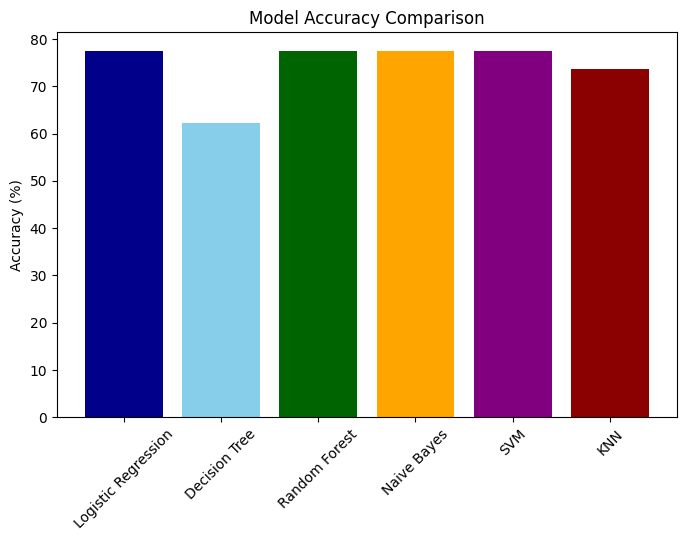

In [25]:
# Plot accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), 
        color=['darkblue', 'skyblue', 'darkgreen', 'orange', 'purple', 'darkred'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()

## Thank you...pls upvote!!!!